In [20]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [21]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [22]:


df = pd.DataFrame(PointsInCircum(500, 1000))
df = pd.concat([df, pd.DataFrame(PointsInCircum(300, 700))])
df = pd.concat([df, pd.DataFrame(PointsInCircum(100, 300))])

# Adding noise to the dataset
noise = [(np.random.randint(-600, 600), np.random.randint(-600, 600)) for _ in range(300)]
df = pd.concat([df, pd.DataFrame(noise)])


In [23]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


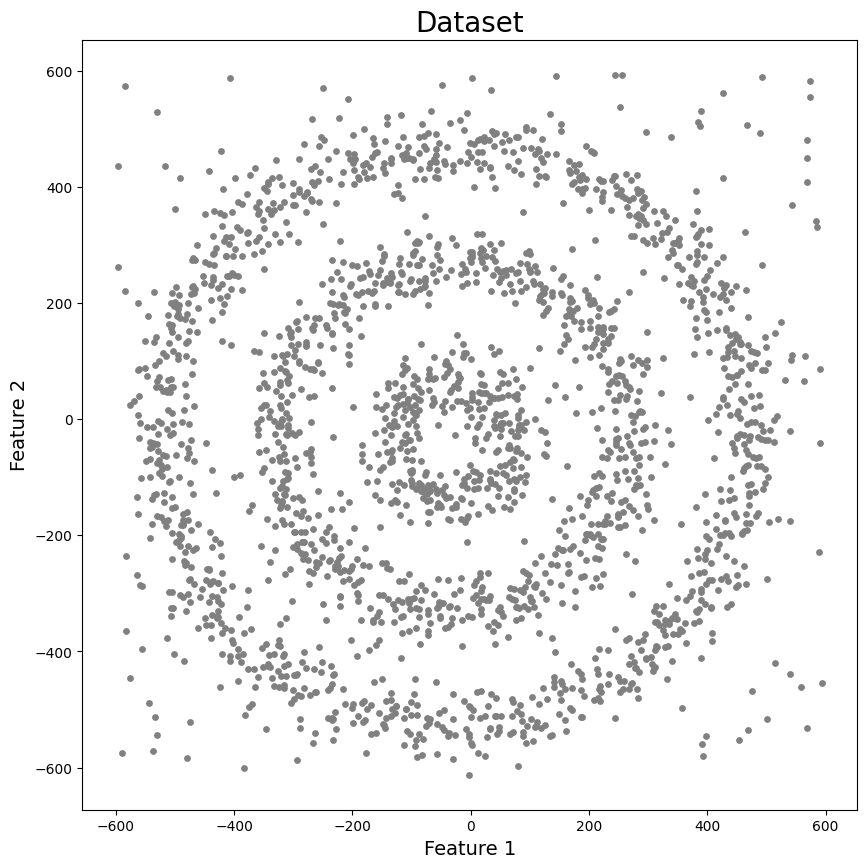

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [25]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

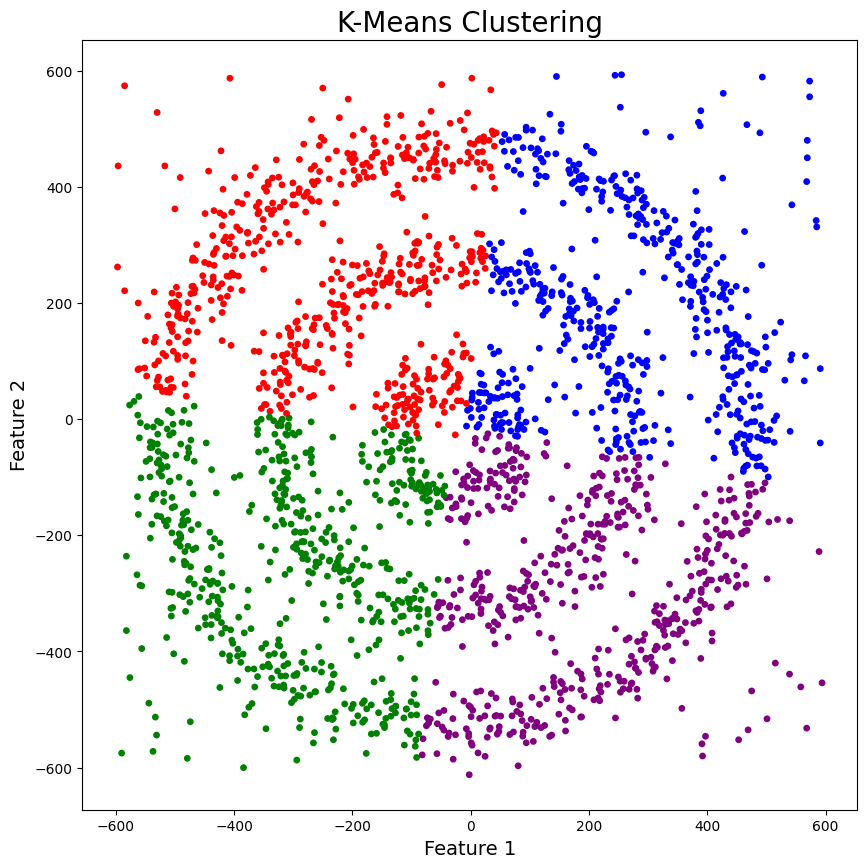

In [26]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, metric='euclidean')
model.fit(df[[0, 1]])


AgglomerativeClustering(n_clusters=4)

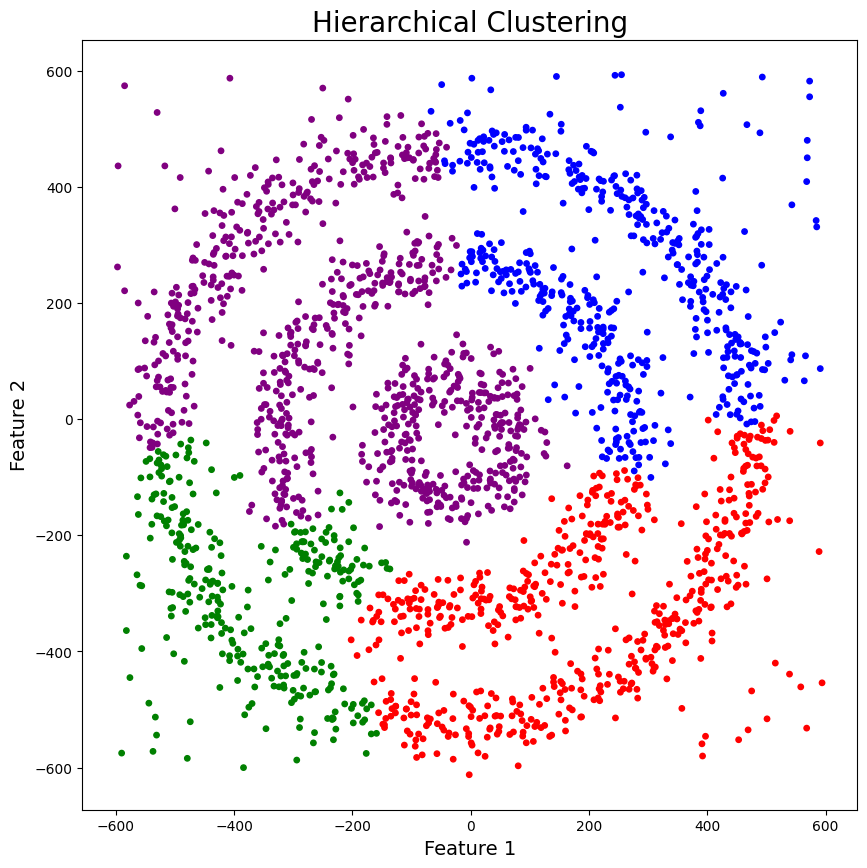

In [28]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(df[[0,1]])


DBSCAN()

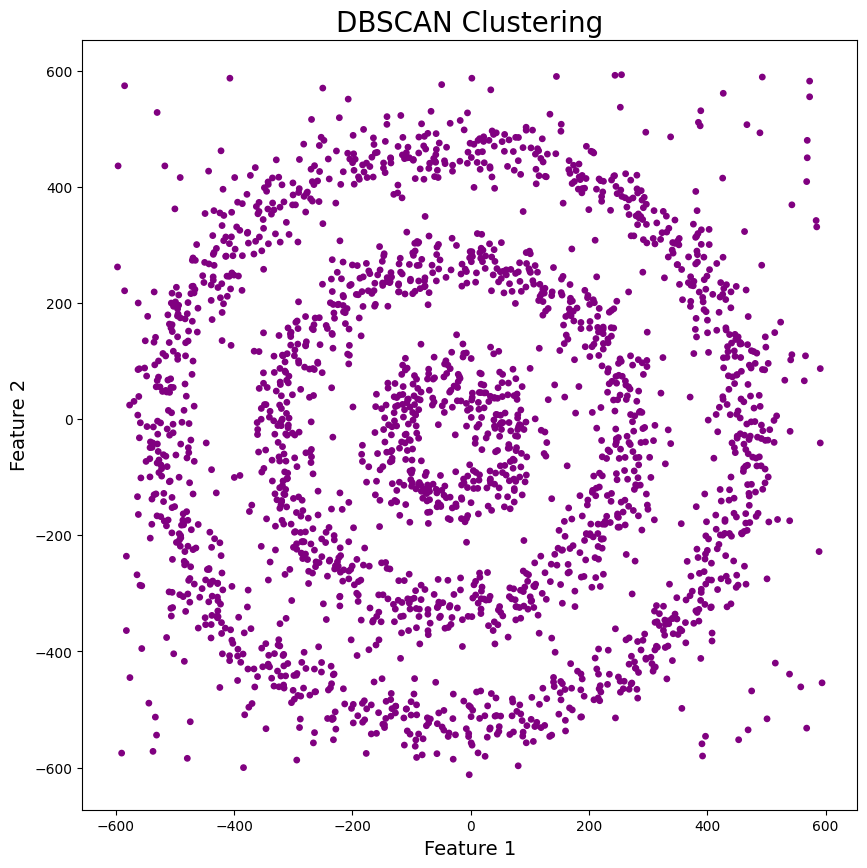

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

# Assign the labels from the DBSCAN model to your DataFrame
df['DBSCAN_labels'] = dbscan.labels_

# Define colors for plotting
# colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plotting the clusters
plt.figure(figsize=(10, 10))
plt.scatter(df[0], df[1], c=df['DBSCAN_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()


In [31]:
# # Plotting resulting clusters
# plt.figure(figsize=(10,10)) 
# plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
# plt.title('DBSCAN Clustering',fontsize=20)
# plt.xlabel('Feature 1',fontsize=14)
# plt.ylabel('Feature 2',fontsize=14)
# plt.show()

In [32]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

In [39]:
indices

array([[   0,  993],
       [   1, 2237],
       [   2,    5],
       ...,
       [2297,  210],
       [2298, 2139],
       [2299, 2059]])

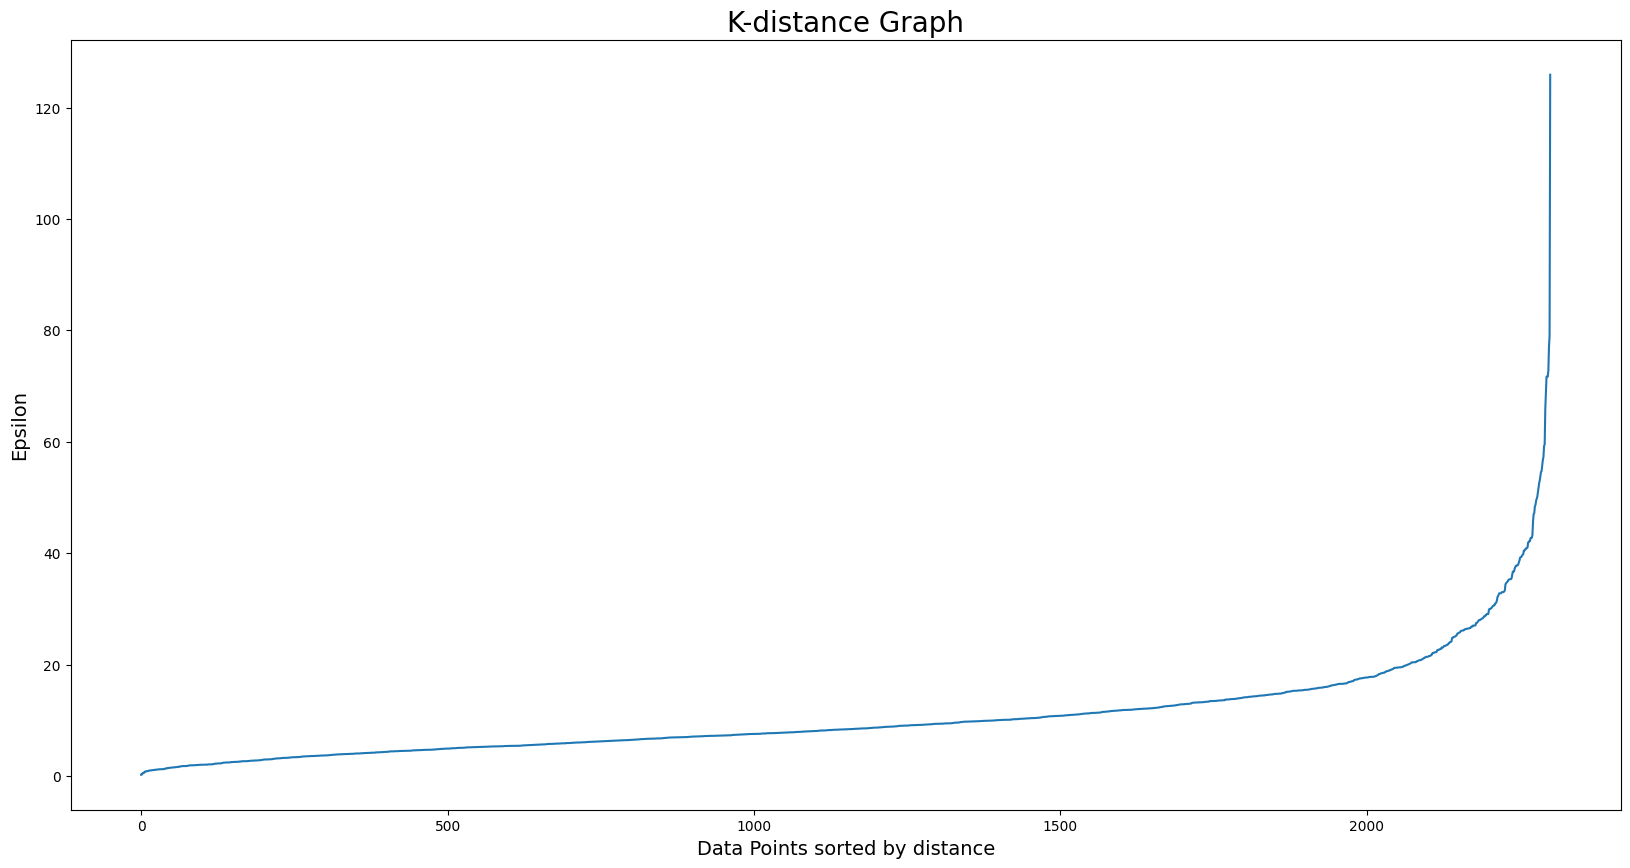

In [33]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [34]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [35]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    1030
 1     730
 2     318
-1     222
Name: count, dtype: int64

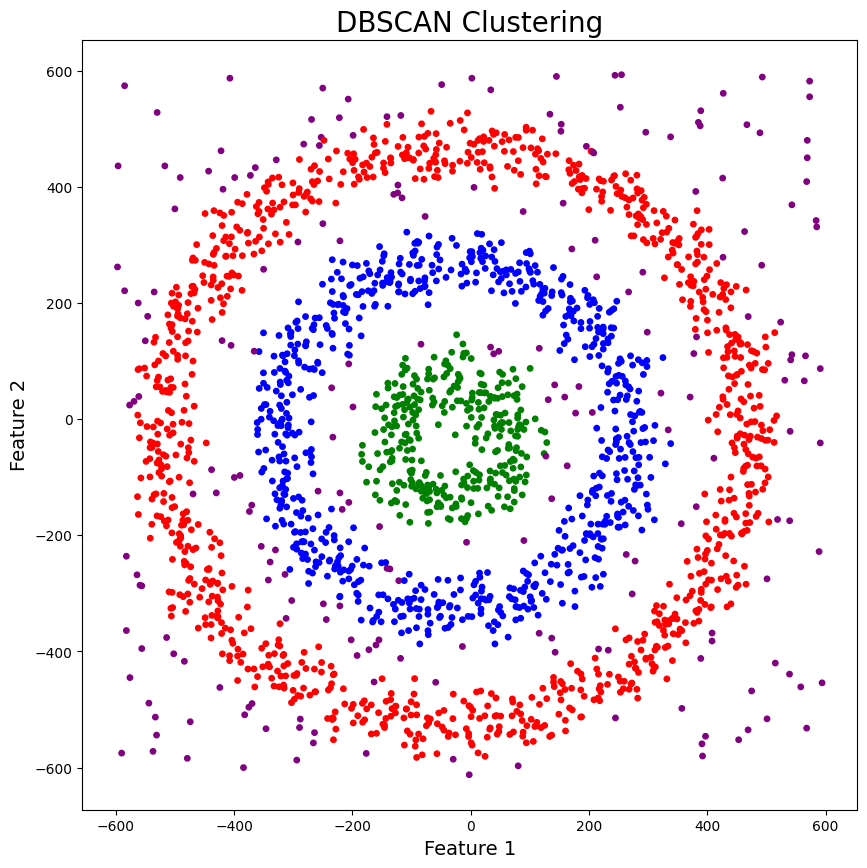

In [36]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

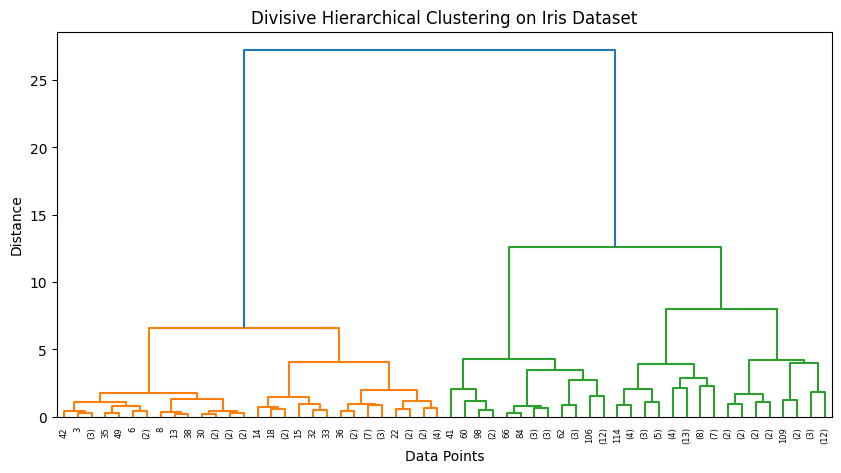

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Extract features

# Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform divisive hierarchical clustering using "ward" linkage
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram to visualize the splits
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)  # Show first 5 levels of hierarchy
plt.title("Divisive Hierarchical Clustering on Iris Dataset")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
